24-Nov-2025 11:49:04 DEBUG utils - Directory . already exists. Skipping.
DEBUG:GEOparse:Directory . already exists. Skipping.
24-Nov-2025 11:49:04 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
24-Nov-2025 11:49:04 INFO GEOparse - Parsing ./GSE10846_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE10846_family.soft.gz: 
24-Nov-2025 11:49:04 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
24-Nov-2025 11:49:04 DEBUG GEOparse - SERIES: GSE10846
DEBUG:GEOparse:SERIES: GSE10846
24-Nov-2025 11:49:04 DEBUG GEOparse - PLATFORM: GPL570
DEBUG:GEOparse:PLATFORM: GPL570
/usr/local/lib/python3.12/dist-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
24-Nov-2025 11:49:06 DEBUG GEOparse - SAMPLE: GSM274895
DEBUG:GEOparse:SAMPLE: GSM274895
24-Nov-2025 11:49:06 DEBUG GEOparse - 

İfade matrisi boyutu: (54675, 420)
      Sample  Cluster
0  GSM274895        0
1  GSM274896        0
2  GSM274897        0
3  GSM274898        0
4  GSM274899        0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


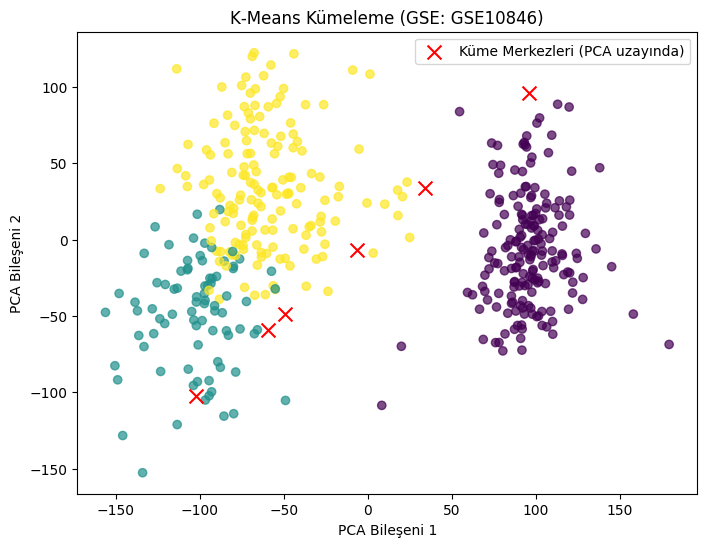

In [ ]:
# Colab ortamında çalıştırmak için

# 1. GEOparse kur
!pip install GEOparse

import GEOparse
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 2. GEO serisini indir (örnek: GSE10846) — bunu istediğin bir GSE numarasıyla değiştir
gse_id = "GSE10846"
gse = GEOparse.get_GEO(geo=gse_id, destdir=".", annotate_gpl=True)

# 3. İfade matrisi (expression matrix) oluştur
#    gse.pivot_samples('VALUE') ile örnek × gen matrisi alabiliriz
expr_df = gse.pivot_samples('VALUE')
print("İfade matrisi boyutu:", expr_df.shape)

# 4. Özellikleri (gen) normalleştir / ölçeklendir (isteğe bağlı ama iyi pratik)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
expr_scaled = scaler.fit_transform(expr_df.T).T  # T: genleri sütuna al, ölçekle, sonra geri çevir
expr_scaled_df = pd.DataFrame(expr_scaled, index=expr_df.index, columns=expr_df.columns)

# 5. K-Means clustering uygula
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(expr_scaled_df.T)  # örnekleri kümelendiriyoruz

# 6. Küme etiketlerini ekle
sample_clusters = pd.DataFrame({'Sample': expr_scaled_df.columns, 'Cluster': labels})
print(sample_clusters.head())

# 7. PCA ile 2 boyutlu görselleştirme
pca = PCA(n_components=2)
components = pca.fit_transform(expr_scaled_df.T)

plt.figure(figsize=(8,6))
plt.scatter(components[:, 0], components[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_), pca.transform(kmeans.cluster_centers_),
            color='red', marker='x', s=100, label='Küme Merkezleri (PCA uzayında)')
plt.title(f"K‑Means Kümeleme (GSE: {gse_id})")
plt.xlabel("PCA Bileşeni 1")
plt.ylabel("PCA Bileşeni 2")
plt.legend()
plt.show()
